### Importa los datos
Dataset con diferentes fármacos, sus efectos y ratings de los clientes.

Importa el dataset *drugLibTrain_raw.tsv*

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv("data/drugLibTrain_raw.tsv", sep="\t")
df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3107 entries, 0 to 3106
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         3107 non-null   int64 
 1   urlDrugName        3107 non-null   object
 2   rating             3107 non-null   int64 
 3   effectiveness      3107 non-null   object
 4   sideEffects        3107 non-null   object
 5   condition          3106 non-null   object
 6   benefitsReview     3089 non-null   object
 7   sideEffectsReview  3032 non-null   object
 8   commentsReview     3095 non-null   object
dtypes: int64(2), object(7)
memory usage: 218.6+ KB


In [8]:
df.describe(include="all")

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
count,3107.000000,3107,3107.000000,3107,3107,3106,3089,3032,3095
unique,NaN,502,NaN,5,5,1426,3031,2813,3046
top,NaN,lexapro,NaN,Highly Effective,Mild Side Effects,depression,none,none,none
freq,NaN,63,NaN,1330,1019,236,20,112,6
mean,2080.607016,NaN,7.006115,NaN,NaN,NaN,NaN,NaN,NaN
std,1187.998828,NaN,2.937582,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,1062.500000,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,2092.000000,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,3092.500000,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN


### Descriptive Analysis

Quedate únicamente con las columnas que podamos manejar: Columnas numéricas y columnas categoricas con pocas categorias (menos de 10)

In [20]:
drugDf = df[["Unnamed: 0", "rating", "effectiveness", "sideEffects"]]
drugDf.head()

,Unnamed: 0,rating,effectiveness,sideEffects
0,2202,4,Highly Effective,Mild Side Effects
1,3117,1,Highly Effective,Severe Side Effects
2,1146,10,Highly Effective,No Side Effects
3,3947,3,Marginally Effective,Mild Side Effects
4,1951,2,Marginally Effective,Severe Side Effects


#### Transforma las columnas categoricas

Transforma las columnas categoricas a numericas mediante dummies

In [21]:
pd.get_dummies(drugDf, dtype=int)

,Unnamed: 0,rating,effectiveness_Considerably Effective,effectiveness_Highly Effective,effectiveness_Ineffective,effectiveness_Marginally Effective,effectiveness_Moderately Effective,sideEffects_Extremely Severe Side Effects,sideEffects_Mild Side Effects,sideEffects_Moderate Side Effects,sideEffects_No Side Effects,sideEffects_Severe Side Effects
0,2202,4,0,1,0,0,0,0,1,0,0,0
1,3117,1,0,1,0,0,0,0,0,0,0,1
2,1146,10,0,1,0,0,0,0,0,0,1,0
3,3947,3,0,0,0,1,0,0,1,0,0,0
4,1951,2,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3102,1039,10,0,1,0,0,0,0,1,0,0,0
3103,3281,1,0,0,1,0,0,1,0,0,0,0
3104,1664,2,0,0,0,1,0,0,0,1,0,0
3105,2621,8,1,0,0,0,0,0,1,0,0,0


In [22]:
my_dict_effe = {"Ineffective":0,
            "Marginally Effective":1,
            "Moderately Effective":2,
            "Considerably Effective":3,
            "Highly Effective":4}

In [23]:
drugDf["effectiveness"] = drugDf["effectiveness"].replace(my_dict_effe)

C:\Users\jaime\AppData\Local\Temp\ipykernel_5156\3611539418.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugDf["effectiveness"] = drugDf["effectiveness"].replace(my_dict_effe)


In [24]:
my_dict_side = {"No Side Effects":0,
            "Mild Side Effects":1,
            "Moderate Side Effects":2,
            "Severe Side Effects":3,
            "Extremely Severe Side Effects":4}

In [25]:
drugDf["sideEffects"] = drugDf["sideEffects"].replace(my_dict_side)

C:\Users\jaime\AppData\Local\Temp\ipykernel_5156\2985739142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drugDf["sideEffects"] = drugDf["sideEffects"].replace(my_dict_side)


In [30]:
drugDf.head()

,Unnamed: 0,rating,effectiveness,sideEffects
0,2202,4,4,1
1,3117,1,4,3
2,1146,10,4,0
3,3947,3,1,1
4,1951,2,1,3


#### Evalua cual es la mejor K

Utiliza silhouette_score para evaluar cual es la mejor K. Evalua como mucho K = 20

#### Genera el K Means 

In [31]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [40]:
kmeans_pk = [KMeans(n_clusters=k, random_state=42).fit(drugDf) for k in range(2,21)]

In [41]:
kmeans_pk

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42),
 KMeans(n_clusters=9, random_state=42),
 KMeans(n_clusters=10, random_state=42),
 KMeans(n_clusters=11, random_state=42),
 KMeans(n_clusters=12, random_state=42),
 KMeans(n_clusters=13, random_state=42),
 KMeans(n_clusters=14, random_state=42),
 KMeans(n_clusters=15, random_state=42),
 KMeans(n_clusters=16, random_state=42),
 KMeans(n_clusters=17, random_state=42),
 KMeans(n_clusters=18, random_state=42),
 KMeans(n_clusters=19, random_state=42),
 KMeans(n_clusters=20, random_state=42)]

In [43]:
silhouette_scores =  [silhouette_score(drugDf, model.labels_) for model in kmeans_pk]
silhouette_scores

[0.6213073006159368,
 0.5879380554330852,
 0.5664255283858842,
 0.562092172064784,
 0.5566905652231059,
 0.5488983177869232,
 0.5463551918694307,
 0.5455879714357837,
 0.5326103856508259,
 0.529677592005205,
 0.532090013038934,
 0.5288646218186647,
 0.5296367639833415,
 0.5276589106269781,
 0.5307080520742012,
 0.536083477463001,
 0.5325816595669256,
 0.5289946180701849,
 0.5289801897126492]

Mayor silhouette scores con K=2

In [36]:
kmeans = KMeans(n_clusters=2, random_state=101)
y_pred = kmeans.fit_predict(drugDf)

In [38]:
y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [37]:
silhouette_score(drugDf, kmeans.labels_)

0.6213073006159368

In [45]:
inercias = [model.inertia_ for model in kmeans_pk]
inercias

[1120072702.521162,
 496222621.2696694,
 282765993.4425493,
 178678715.98759913,
 122567076.9718444,
 91331909.38516429,
 69270640.09100457,
 54638060.22230319,
 46550435.10869971,
 37585567.56636364,
 31479990.94960024,
 26755439.303213377,
 23026513.655636586,
 20055213.313643496,
 17433049.43933726,
 15129688.548697282,
 13635463.419871805,
 12336150.19312667,
 11261713.08879365]

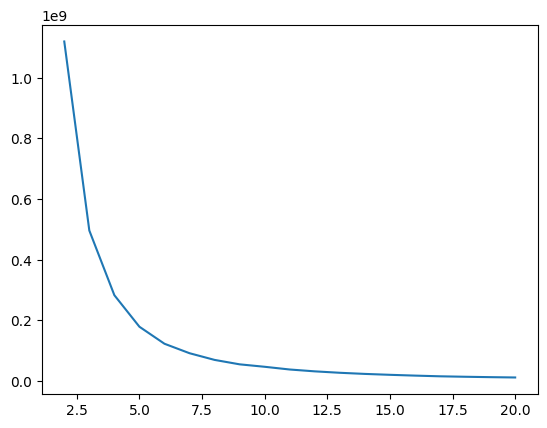

In [47]:
plt.plot(range(2,21), inercias)

Con el Elbow method comprobamos que k=2 sería la opción más adecuada

In [48]:
kmeans = KMeans(n_clusters=2, random_state=42).fit(drugDf)
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 0])

#### Muestra en un gráfico de tartas la distribución de los distintos clusters

In [52]:
df_clusters = pd.DataFrame(kmeans.labels_, columns=["Cluster"])
df_clusters.head()

,Cluster
0,0
1,0
2,1
3,0
4,1


<Axes: ylabel='count'>

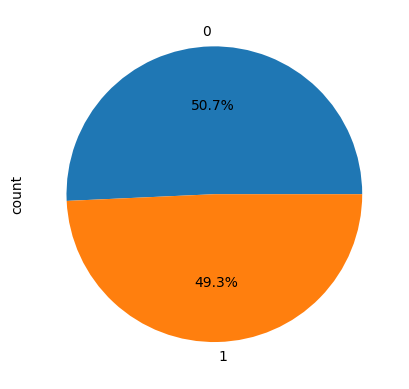

In [53]:
df_clusters['Cluster'].value_counts().plot.pie(autopct="%.1f%%")